In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,davies_bouldin_score,adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [35]:
df=pd.read_csv("Wholesale_customers_data.csv")
print(df.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  


In [38]:
features=df[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper' ,'Delicatessen']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)


1 : 2640.0
2 : 1954.0416346097836
3 : 1612.9640766070934
4 : 1312.524603206828
5 : 1058.7712532570085
6 : 923.5412175232609
7 : 825.8293500794132
8 : 744.2113430456332
9 : 666.5806882010728


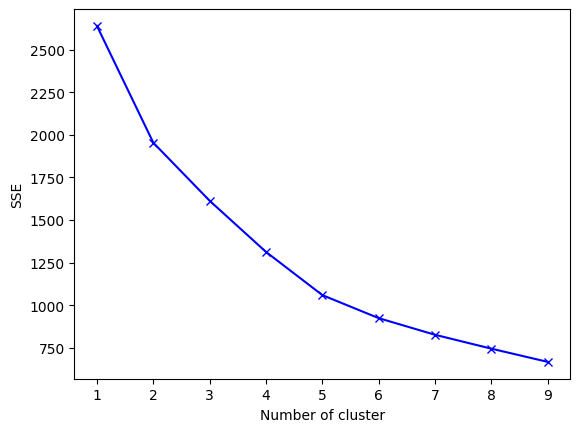

In [39]:
# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the scaled data to the algorithm. 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k,n_init=10).fit(data_scaled)
    sse[k] = kmeans.inertia_     # Use inertia attribute from the clustering object and store the inertia value for that K
for key, val in sse.items():
    print(f'{key} : {val}')
# step 3
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()


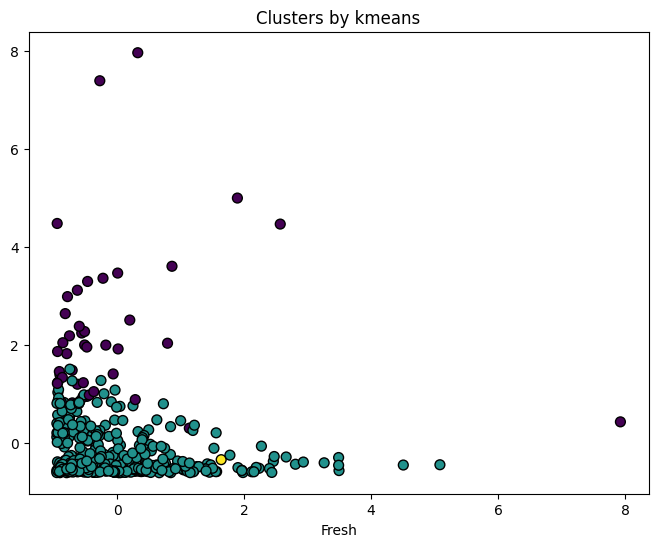

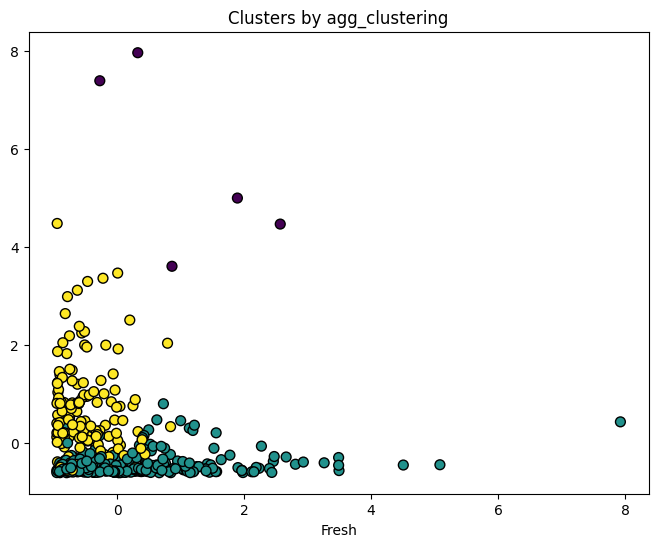

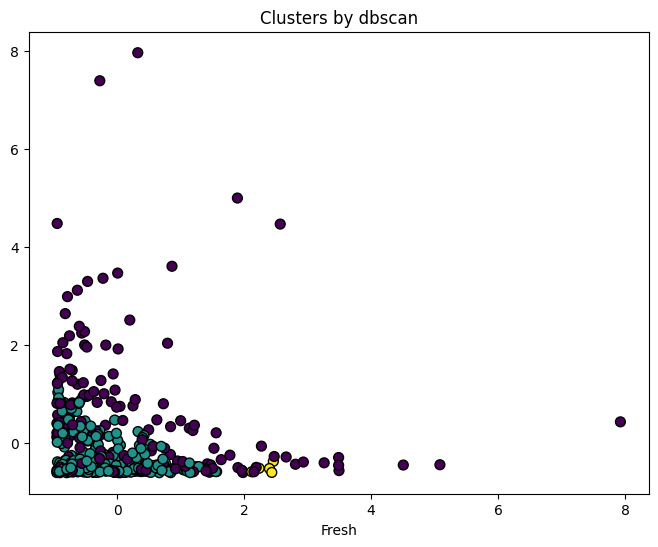

            Model  silhouette_avg   davies_bouldin
0          kmeans        0.548287         0.927935
1  agg_clustering        0.264609         1.284521
2          dbscan        0.195811         1.579362


In [71]:
def plot_clusters_2d(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 4], c=labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(title)
    plt.xlabel('Fresh' )
    plt.ylabel('')
    plt.show()
results_df = pd.DataFrame(columns=['Model', 'silhouette_avg',' davies_bouldin'])
models = {
            'kmeans':  KMeans(n_clusters=3, random_state=42,n_init=10),
            'agg_clustering': AgglomerativeClustering(n_clusters=3),
            'dbscan': DBSCAN(eps=0.5, min_samples=5)
        }
for model_name, model in models.items():
            labels = model.fit_predict(data_scaled)
            silhouette_avg = silhouette_score(data_scaled, labels)
            davies_bouldin = davies_bouldin_score(data_scaled, labels)

            results_df.loc[len(results_df.index)]=[model_name,silhouette_avg,davies_bouldin ]
          
            plot_clusters_2d(data_scaled, labels, f'Clusters by {model_name}')
print(results_df) 

In [74]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming 'data_scaled' is your scaled data

models = {
    'kmeans': KMeans(),
    'agg_clustering': AgglomerativeClustering(),
    'dbscan': DBSCAN()
}

param_grids = {
    'kmeans': {'n_clusters': [2, 3, 4, 5], 'init': ['k-means++', 'random'], 'max_iter': [100, 200, 300]},
    'agg_clustering': {'n_clusters': [2, 3, 4, 5], 'linkage': ['ward', 'complete', 'average']},
    'dbscan': {'eps': [0.1, 0.5, 1.0], 'min_samples': [3, 5, 7]}
}

results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Silhouette Score', 'Davies-Bouldin Score'])

for model_name, model in models.items():
    param_grid = param_grids[model_name]

    # Implement a custom scoring function based on silhouette score
    def custom_silhouette_scorer(estimator, X):
        labels = estimator.fit_predict(X)
        return silhouette_score(X, labels)

    grid_search = GridSearchCV(model, param_grid, scoring=custom_silhouette_scorer, cv=5)
    grid_search.fit(data_scaled)

    best_model = grid_search.best_estimator_
    labels = best_model.fit_predict(data_scaled)

    silhouette_avg = silhouette_score(data_scaled, labels)
    davies_bouldin = davies_bouldin_score(data_scaled, labels)

    results_df.loc[len(results_df.index)] = [model_name, grid_search.best_params_, silhouette_avg, davies_bouldin]

# Print the results DataFrame
print(results_df)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

            Model                                    Best Parameters  \
0          kmeans  {'init': 'k-means++', 'max_iter': 100, 'n_clus...   
1  agg_clustering            {'linkage': 'average', 'n_clusters': 2}   
2          dbscan                     {'eps': 1.0, 'min_samples': 7}   

   Silhouette Score  Davies-Bouldin Score  
0          0.590904              1.160476  
1          0.863801              0.092662  
2          0.562037              1.687617  


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan -0.07876993  0.01228342 -0.00296432
  0.37711096  0.39830258  0.41044603]
  warnings.warn(
